In [1]:
#question 36

import numpy as np

def gini_impurity(labels):
    """
    Calculate the Gini impurity for a list of class labels.

    Parameters:
    labels (list): A list of class labels.

    Returns:
    float: Gini impurity value.
    """
    # Count the occurrences of each class label
    class_counts = {}
    for label in labels:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    # Calculate the Gini impurity
    total_samples = len(labels)
    gini = 1.0
    for label in class_counts:
        probability = class_counts[label] / total_samples
        gini -= probability ** 2

    return gini

def gini_gain(X, y, attribute_index):
    """
    Calculate the Gini gain for splitting based on a specific attribute of the dataset.

    Parameters:
    X (numpy.ndarray): Features of the dataset.
    y (numpy.ndarray): Target labels of the dataset.
    attribute_index (int): Index of the attribute for splitting.

    Returns:
    float: Gini gain value.
    """
    # Calculate Gini impurity of the parent node
    parent_gini = gini_impurity(y)

    # Get unique values of the attribute
    attribute_values = np.unique(X[:, attribute_index])

    # Calculate weighted sum of Gini impurities for child nodes
    weighted_sum_child_gini = 0.0
    total_samples = len(y)
    for value in attribute_values:
        indices = np.where(X[:, attribute_index] == value)[0]
        labels_subset = y[indices]
        weight = len(indices) / total_samples
        child_gini = gini_impurity(labels_subset)
        weighted_sum_child_gini += weight * child_gini

    # Calculate Gini gain
    gini_gain_value = parent_gini - weighted_sum_child_gini
    return gini_gain_value

# Example usage:
if __name__ == "__main__":
    # Example dataset
    X = np.array([[1, 'A'], [1, 'B'], [2, 'A'], [3, 'B'], [3, 'B']])
    y = np.array(['yes', 'no', 'no', 'yes', 'yes'])

    # Calculate Gini gain for each attribute
    for i in range(X.shape[1]):
        gini_gain_value = gini_gain(X, y, i)
        print(f"Gini gain for attribute {i}: {gini_gain_value:.4f}")


Gini gain for attribute 0: 0.2800
Gini gain for attribute 1: 0.0133


<ipython-input-2-ac5c2e3f3c79>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


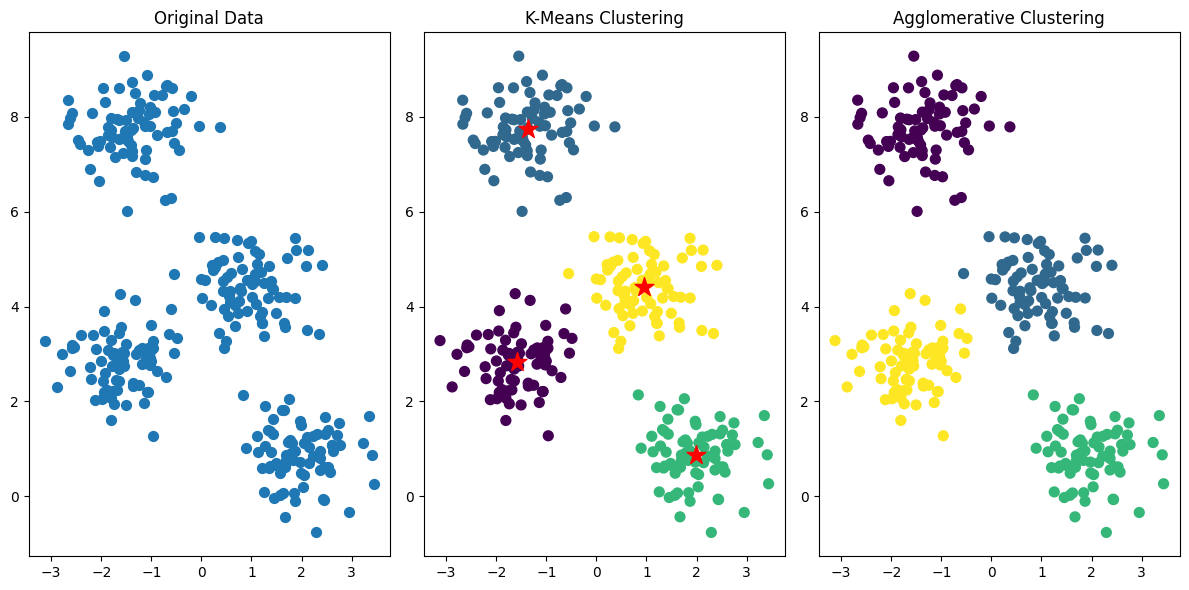

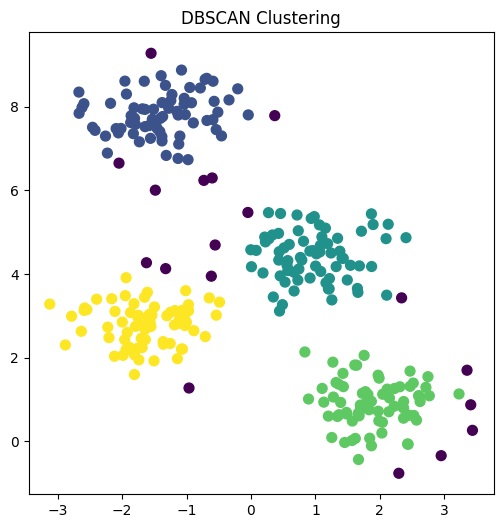

In [2]:
#question 37

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Original Data")

# K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title("K-Means Clustering")

# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")

plt.tight_layout()
plt.show()

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


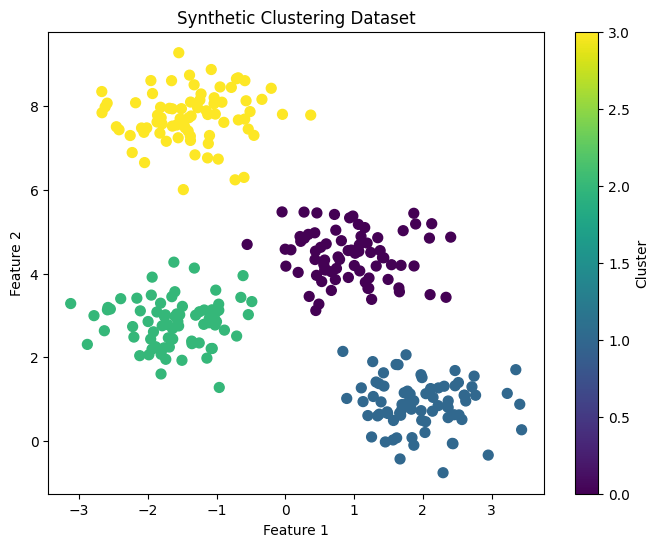

Synthetic Clustering Dataset Summary:
Number of samples: 300
Number of features: 2
Number of clusters: 4


In [3]:
#question 38
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic clustering dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Visualize the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title("Synthetic Clustering Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Summary of the dataset
print("Synthetic Clustering Dataset Summary:")
print("Number of samples:", len(X))
print("Number of features:", X.shape[1])
print("Number of clusters:", len(np.unique(y)))



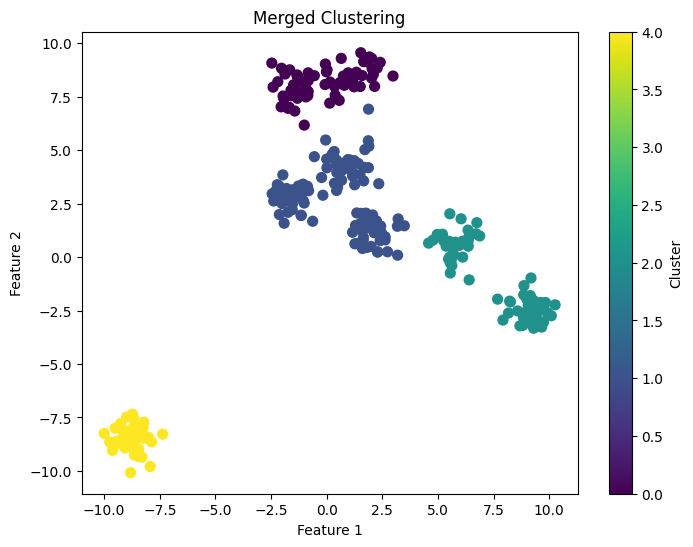

In [4]:
#question 39
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

def merge_clusters(X, y, desired_clusters):
    n_clusters = len(np.unique(y))
    while n_clusters > desired_clusters:
        # Calculate pairwise distances between cluster centroids
        cluster_centers = []
        for cluster_label in np.unique(y):
            cluster_center = np.mean(X[y == cluster_label], axis=0)
            cluster_centers.append(cluster_center)
        distances = pairwise_distances(cluster_centers)

        # Find the closest pair of clusters
        min_distance = np.inf
        merge_indices = None
        for i in range(len(distances)):
            for j in range(i + 1, len(distances)):
                if distances[i, j] < min_distance:
                    min_distance = distances[i, j]
                    merge_indices = (i, j)

        # Merge the closest pair of clusters
        y[y == merge_indices[1]] = merge_indices[0]
        n_clusters -= 1

    return y

# Generate synthetic clustering dataset
X, _ = make_blobs(n_samples=300, centers=8, cluster_std=0.6, random_state=0)

# Initial clustering with Agglomerative Clustering
initial_clusters = 8
agg_clustering = AgglomerativeClustering(n_clusters=initial_clusters)
y_init = agg_clustering.fit_predict(X)

# Merge clusters until desired number of clusters is achieved
desired_clusters = 4
y_merged = merge_clusters(X, y_init, desired_clusters)

# Visualize the final clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_merged, s=50, cmap='viridis')
plt.title("Merged Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()



In [6]:
#question 40

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Sample transaction data
data = {'TID': [1, 2, 3, 4, 5],
        'Items': [['bread', 'milk'], ['bread', 'diapers', 'beer', 'eggs'],
                  ['milk', 'diapers', 'beer', 'cola'], ['bread', 'milk', 'diapers', 'beer'],
                  ['bread', 'milk', 'diapers', 'cola']]}

df = pd.DataFrame(data)

# Convert the transaction data into one-hot encoded format
def one_hot_encoding(df):
    items_series = df['Items']
    unique_items = list(set(item for transaction in items_series for item in transaction))
    onehot_encoded = pd.DataFrame(columns=unique_items, data=0, index=df.index)
    for idx, transaction in enumerate(items_series):
        onehot_encoded.loc[idx, transaction] = 1
    return onehot_encoded

onehot_encoded_df = one_hot_encoding(df)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_encoded_df, min_support=0.6, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Find association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print association rules
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support          itemsets
0      0.8           (bread)
1      0.8         (diapers)
2      0.8            (milk)
3      0.6            (beer)
4      0.6  (bread, diapers)
5      0.6     (milk, bread)
6      0.6   (milk, diapers)
7      0.6   (diapers, beer)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0     (bread)   (diapers)                 0.8                 0.8      0.6   
1   (diapers)     (bread)                 0.8                 0.8      0.6   
2      (milk)     (bread)                 0.8                 0.8      0.6   
3     (bread)      (milk)                 0.8                 0.8      0.6   
4      (milk)   (diapers)                 0.8                 0.8      0.6   
5   (diapers)      (milk)                 0.8                 0.8      0.6   
6   (diapers)      (beer)                 0.8                 0.6      0.6   
7      (beer)   (diapers)                 0.6                 0.8      0.6  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
